# Histogram equalization

In [31]:
import numpy as np
import tifffile as tif
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
def read_tif(fname):
    
    t = tif.imread(fname)
    img = np.zeros(t.shape)
    img[:,:] = tif.imread(fname)
    
    return img


def normalize(tile):
    
    vmin = tile.min(); vmax = tile.max()
    new_tile = (tile-vmin)*255/(vmax-vmin)
    
    return new_tile.astype("uint8")

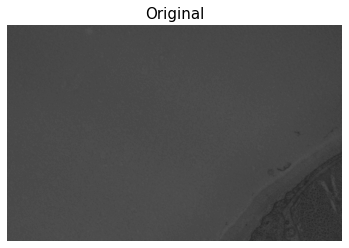

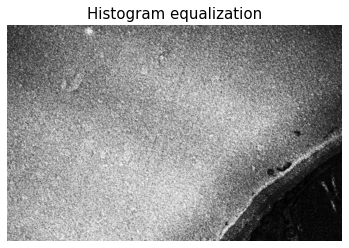

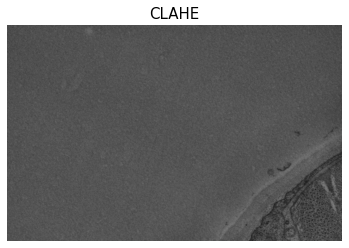

In [75]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L1/tif/L1_s0028.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15)
plt.show()

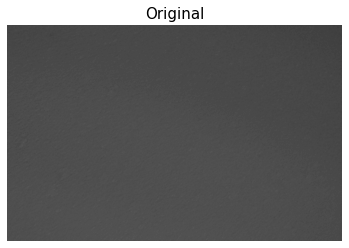

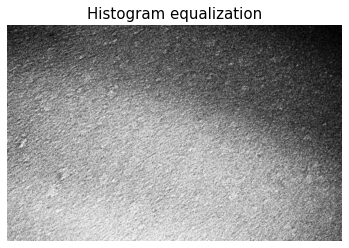

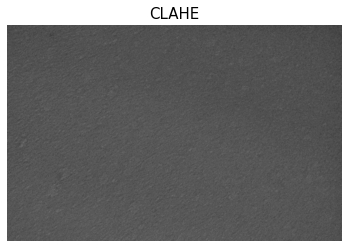

In [76]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L1/tif/L1_s0015.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Original", fontsize=15)
plt.show()

tile_histeq = cv2.equalizeHist(tile)

plt.figure()
plt.imshow(tile_histeq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Histogram equalization", fontsize=15)
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
tile_clahe = clahe.apply(tile)

plt.figure()
plt.imshow(tile_clahe, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("CLAHE", fontsize=15) 1
plt.show()

In [86]:
from os import listdir, path

d = "/data/research/se/celegans/dataset3/N2DA_1430-2/test/tif/"
flist = listdir(d)

var_list = []

for i in range(len(flist)):
    
    fname = path.join(d, flist[i])
    img = read_tif(fname)
    img = normalize(img)
    
    var_list.append(np.var(img))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


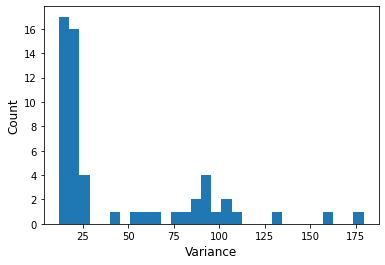

In [87]:
plt.figure()
plt.hist(var_list, bins=30)
plt.xlabel("Variance", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [122]:
np.argsort(np.array(var_list))

array([19,  7, 17, 23, 18, 22, 34, 54, 27,  2, 20, 12, 45,  6, 16, 11, 21,
       35,  3,  1,  8,  0, 10,  9,  5, 24, 55,  4, 37, 47, 13, 26, 15, 25,
       46, 14, 36, 28, 33, 49, 44, 41, 43, 42, 40, 39, 53, 52, 38, 48, 50,
       51, 32, 29, 31, 30])

In [89]:
np.where(np.array(var_list)<30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 34, 35, 36, 37, 45, 46,
        47, 54, 55]),)

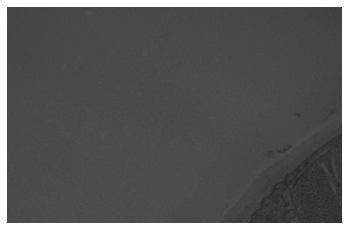

In [121]:
fname = "/data/research/se/celegans/dataset3/N2DA_1430-2/L1/tif/L1_s0028.tif"
tile = read_tif(fname)
tile = normalize(tile)

plt.figure()
plt.imshow(tile, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()